### test_mcp_servers.py Results Analysis

    This notebook helps users analyze and visualize the results of running `test_mcp_servers.py` to help them determine what the best combination of LLM and MCP tools. It demonstrates the performance of the models results by visualization using stacked bar charts, enabling quick comparison of tool call accuracy. The analysis includes tool calling matching and verified inference output comparison charts.


### Generate Dataset,
    
    The metrics for this notebook are generated by test_mcp_servers.py and loaded from results/metrics.csv. The metrics are plotted using util.py. Please be sure to run `python test_mcp_servers.py` first before rerunning this Notebook.

### Definitions,
    
    Tool_call_match (boolean): Indicates whether the correct tool call was used by the Agent in response to a given prompt. This metric provides insight into the Agent's ability to correctly utilize tools and avoid hallucination.
    inference_not_empty (boolean): Indicates whether the Agent generated an output after tool call execution. This metric reflects the Agent's ability to use information obtained from tool calls.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import util

In [2]:
file_path = './results/metrics.csv'
df = pd.read_csv(file_path)

### Function to create a comparison bar chart of each model. 
This shows the count of true and false values for both tool_call_match and inference_not_empty
It displays this information in a bar chart with the True values in green and False values in grey above for each model.

### PLOT 1: Bar chart comparing both Llama-3.2-3b and granite-3.2-8b models tool call matching for all the server models

Plot saved as JPEG: 'results/plots/Overall comparison check of correct tool call.jpg'


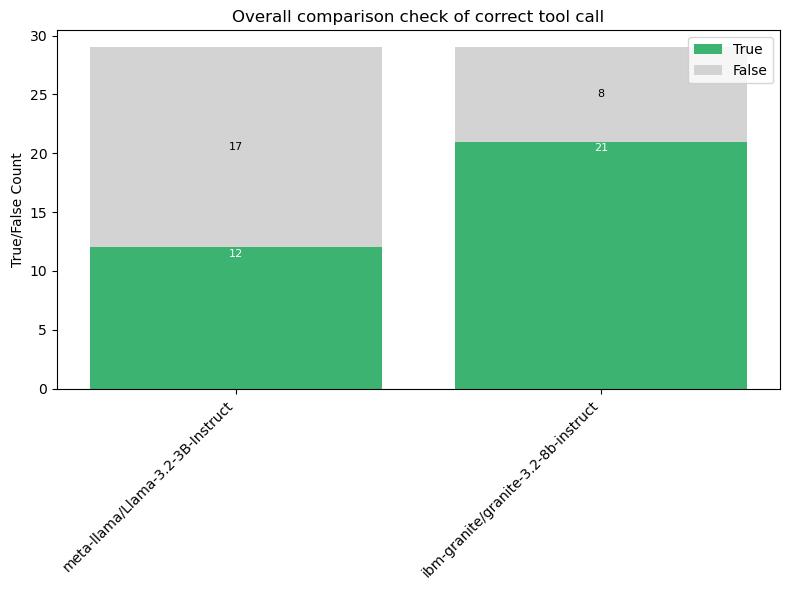

In [3]:

# Create a Matplotlib figure and axis (1 row, 1 col)
fig, ax = plt.subplots(figsize=(8, 6))
# Call the Matplotlib version of add_plot (see previous response)
util.add_plot(fig, ax, df, column_name='tool_call_match', title='Overall comparison check of correct tool call')

# Show the plot
plt.tight_layout()
plt.show()


### PLOT 2: Bar chart comparing both Llama-3.2-3b and granite-3.2-8b models tool call matching for each of the server models

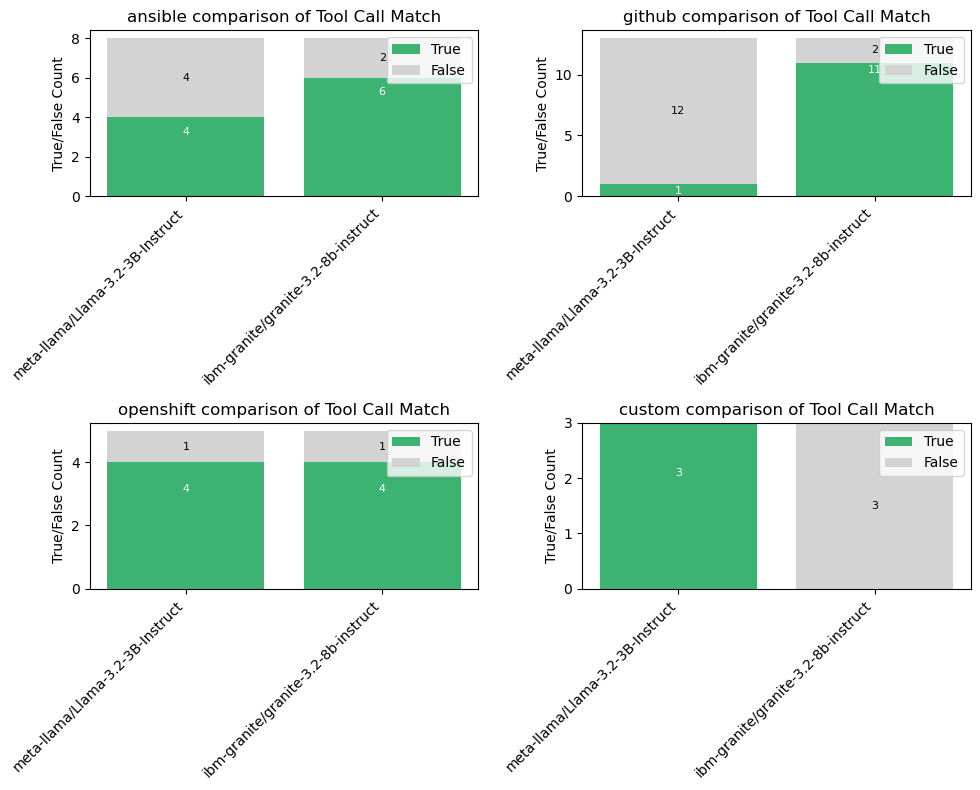

Plot saved as JPEG: 'results/plots/Comparison of tool_call_match by server type.jpg'


In [4]:
util.subplots_comparison(df, column_name='tool_call_match')

### PLOT 3: Bar chart comparing the models inference output given, for all the server models

Plot saved as JPEG: 'results/plots/Overall comparison check of inference not empty.jpg'


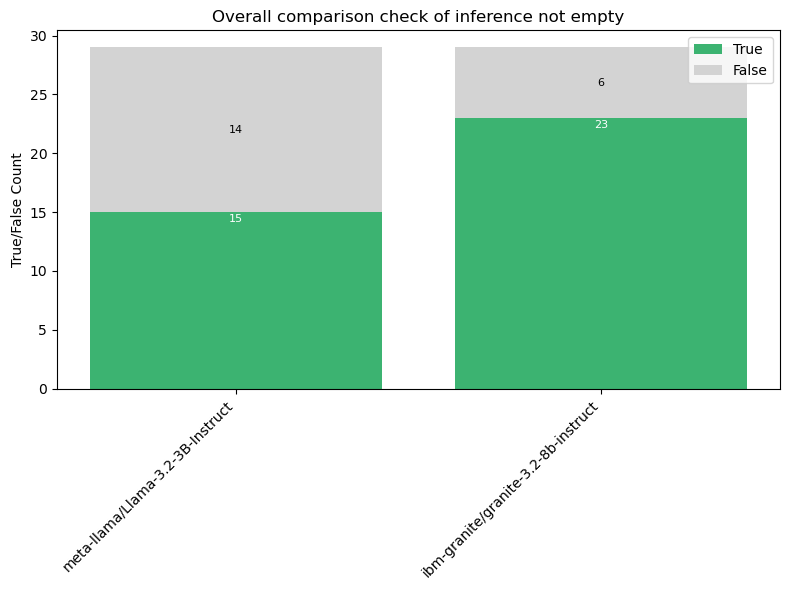

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
util.add_plot(fig, ax, df, column_name='inference_not_empty', title='Overall comparison check of inference not empty')
plt.tight_layout()
plt.show()

### PLOT 4: Bar chart showing a breakdown of the models inference output given for all the server models

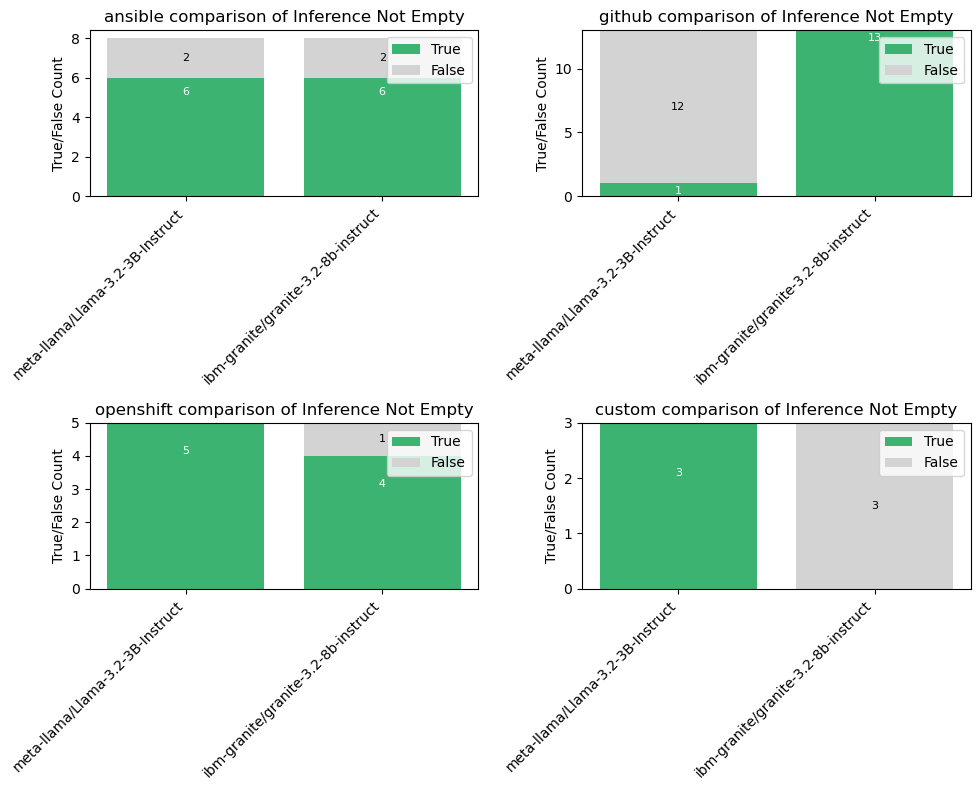

Plot saved as JPEG: 'results/plots/Comparison of inference_not_empty by server type.jpg'


In [6]:
util.subplots_comparison(df, column_name='inference_not_empty')

### Key takeaways
1. In plot 1, for Tool call matching,  The Granite-3.2-8b model outperforms the Llama-3.2-3B model overall by 175%.
2. In plot 3, for infernece output given, The Granite-3.2-8b model outperforms the Llama-3.2-3B overall by 153.33%.
3. In Plot 2 and 4, the Llama-3.2-3B model only outperforms the Granite-3.2-8B model for the custom tool server. Although Llama-3.2-3B provides more inference output for Openshift server , this is a hallucination as it failed to tool call for the Openshift on all 5 prompts.